In [6]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [65]:
data = np.genfromtxt('cleaned_used_car_data.csv', delimiter=",", skip_header=1, dtype=np.int64,usecols=np.arange(0,9))
data

array([[     -1,      12,       0, ...,       6,     200,  975000],
       [     -1,       6,       1, ...,       8,     100, 3000000],
       [     -1,      12,       0, ...,       6,   42000,  975000],
       ...,
       [     -1,      11,       0, ...,       8,   11000, 5800000],
       [     -1,      11,       0, ...,       8,   25000, 4900000],
       [     -1,       9,       0, ...,      11,   14000, 3555555]],
      dtype=int64)

In [66]:
data = np.delete(data, 0, 1)

In [67]:
data.shape #the row and column size

(1901, 8)

In [23]:
data.dtype #it is int64 and each integer in array is of 8 bytes not 4 bytes.

dtype('int64')

In [21]:
Model_year = data[:, 0]

In [57]:

mean=[]
count=[]
std=[]
max_value=[]
min_value=[]
percentile_25 = []
percentile_50 = []
percentile_75 = []

for i in range(data.shape[1]):
    count.append(data[:,i].sum())
    mean.append(data[:,i].mean())
    std.append(data[:,i].std())
    min_value.append(data[:,i].min())
    max_value.append(data[:,i].max())
    percentile_25.append(np.percentile(data[:,i],25))
    percentile_50.append(np.percentile(data[:,i],50))
    percentile_75.append(np.percentile(data[:,i],75))


###### Here we calculated statistical measures columnwise for all  the features. All the values are stored in respected list

In [58]:
from prettytable import PrettyTable
table = PrettyTable()

In [59]:
table.add_column("Field_Name",["Model_year","Transmission","Engine_size(cc)","Drivetrain","Fuel_type","Lot_no","Kilometer","Price"])
table.add_column('Count',count)
table.add_column('Count',mean)
table.add_column('Count',std)
table.add_column('Count',min_value)
table.add_column('Count',max_value)
table.add_column('Count',percentile_25)
table.add_column('Count',percentile_50)
table.add_column('Count',percentile_75)


###### you use the PrettyTable.add_column method, which takes two arguments - a string which is the name for the field the column you are adding corresponds to, and a list or tuple which contains the column data:

In [60]:
print(table) #the statistic data for each features

+-----------------+------------+----------------------+---------------------+-------+----------+-----------+-----------+-----------+
|    Field_Name   |   Count    |        Count         |        Count        | Count |  Count   |   Count   |   Count   |   Count   |
+-----------------+------------+----------------------+---------------------+-------+----------+-----------+-----------+-----------+
|    Model_year   |   21976    |  11.560231457127827  |  4.097468040645714  |   2   |    35    |    9.0    |    11.0   |    13.0   |
|   Transmission  |     76     | 0.039978958442924775 | 0.19590977853273095 |   0   |    1     |    0.0    |    0.0    |    0.0    |
| Engine_size(cc) |  2699820   |  1420.2104155707523  |  507.41337321466153 |  624  |   4400   |   1100.0  |   1200.0  |   1600.0  |
|    Drivetrain   |    215     | 0.11309836927932668  |  0.3167130059623124 |   0   |    1     |    0.0    |    0.0    |    0.0    |
|    Fuel_type    |    371     | 0.19516044187269857  | 0.39632416504

## Outlier in numeric columns

Using Z score Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

In [71]:
#Lets find the outlier in numeric features: 'Engine_size(cc)', 'Kilometer', 'Model_year'

In [74]:
def detect_outliers(data):
    outliers=[]
    threshold=3      # here threshod is 3 because we want only those data point that falls outside of 3 standard deviations
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [75]:
engine_size = data[:,2]
outlier_pt=detect_outliers(engine_size)
outlier_pt

[3000,
 3000,
 3000,
 2956,
 3000,
 2999,
 2956,
 2956,
 2997,
 3000,
 3000,
 3000,
 3000,
 3000,
 2982,
 4200,
 3000,
 2986,
 4200,
 4400,
 3000,
 3000,
 3000,
 2982,
 4200,
 3000,
 3000]

In [76]:
outlier_percentage = (len(outlier_pt)/len(engine_size))*100
outlier_percentage

1.4203051025775908

######  Outlier Percentage of Engine size = 1.4203051025775908

In [77]:
kilometer_travelled = data[:,6]
outlier_kilogram_travelled=detect_outliers(kilometer_travelled)
outlier_kilogram_travelled

[350000,
 360000,
 170000,
 203000,
 200000,
 332000,
 179000,
 695000,
 180000,
 800000,
 500000,
 180000,
 200000,
 200000,
 515175,
 200000]

In [78]:
outlier_percentage = (len(outlier_kilogram_travelled)/len(kilometer_travelled))*100
outlier_percentage

0.8416622830089426

######  Outlier percentage of kilometer travelled : 0.8416622830089426

###### Another way to calculate outlier is by calculating InterQuartileRange

InterQuantile Range
75%- 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4. Find lower bound q1*1.5
5. Find upper bound q3*1.5


Anything that lies outside of lower and upper bound is an outlier

In [79]:
sorted(kilometer_travelled)

[100,
 150,
 200,
 300,
 300,
 300,
 369,
 370,
 400,
 600,
 1000,
 1200,
 1200,
 1500,
 1500,
 1700,
 1800,
 1991,
 1995,
 2015,
 2200,
 2400,
 2400,
 2800,
 3000,
 3000,
 3200,
 3200,
 3400,
 3500,
 3500,
 3500,
 3700,
 3800,
 3800,
 4000,
 4000,
 4000,
 4000,
 4200,
 4300,
 4500,
 4500,
 4500,
 4900,
 5000,
 5000,
 5000,
 5000,
 5185,
 5200,
 5200,
 5200,
 5500,
 5500,
 5500,
 5900,
 6000,
 6000,
 6000,
 6000,
 6000,
 6000,
 6300,
 6300,
 6400,
 6500,
 6500,
 6500,
 6500,
 6600,
 6660,
 6700,
 7000,
 7000,
 7000,
 7000,
 7000,
 7000,
 7000,
 7000,
 7000,
 7000,
 7100,
 7100,
 7200,
 7231,
 7500,
 7500,
 7800,
 7900,
 7900,
 8000,
 8000,
 8000,
 8000,
 8000,
 8000,
 8000,
 8000,
 8000,
 8500,
 8700,
 8800,
 8900,
 9000,
 9000,
 9000,
 9000,
 9000,
 9000,
 9000,
 9000,
 9000,
 9000,
 9000,
 9000,
 9100,
 9500,
 9500,
 9500,
 9800,
 9900,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10500,
 10800,
 10900,
 11000,
 11000,
 11000,
 11000,
 1100

In [80]:
quantile1, quantile3= np.percentile(kilometer_travelled,[25,75])
print(quantile1,quantile3)

25000.0 50000.0


In [81]:
## Find the IQR

iqr_value=quantile3-quantile1
print(iqr_value)

25000.0


In [83]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value)
print(lower_bound_val,upper_bound_val)

-12500.0 87500.0


###### The lower bound for outllier  : -12500 and upper bound : 87500 for Kilometer travelled.

In [85]:
#model year
model_year = data[:,0]
outlier_model_year=detect_outliers(model_year)
outlier_model_year

[26,
 25,
 25,
 25,
 24,
 25,
 26,
 24,
 24,
 25,
 25,
 29,
 24,
 29,
 25,
 26,
 32,
 30,
 32,
 35,
 24,
 31,
 31,
 27,
 24,
 34,
 34]

In [86]:
outlier_percentage = (len(outlier_model_year)/len(model_year))*100
outlier_percentage

1.4203051025775908

###### Outlier percentage of how long the car model was manufactured : 1.4203051025775908

(array([1.012e+03, 6.430e+02, 1.560e+02, 5.500e+01, 1.600e+01, 8.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([2.01100000e+03, 1.60191045e+06, 3.20180990e+06, 4.80170935e+06,
        6.40160880e+06, 8.00150825e+06, 9.60140770e+06, 1.12013072e+07,
        1.28012066e+07, 1.44011060e+07, 1.60010055e+07, 1.76009049e+07,
        1.92008044e+07, 2.08007038e+07, 2.24006033e+07, 2.40005028e+07,
        2.56004022e+07, 2.72003016e+07, 2.88002011e+07, 3.04001006e+07,
        3.20000000e+07]),
 <BarContainer object of 20 artists>)

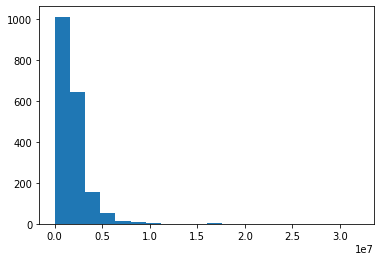

In [93]:
#plot
plt.hist(data[:,7],bins=20)

The price (dependent variable ) distribution is a left skewed.the mean is less than the median. This also means that most of the car are sold at lower price which shifted the mean but not median.

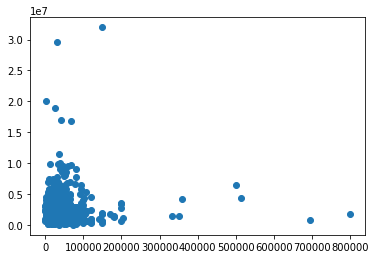

In [94]:
# scatter plot between kilometer travelled and price.
plt.scatter(data[:,6], data[:,7])
plt.show()

 The higher the kilometer travelled lower the price and vice versa but here due to the sell of less travelled car at low price the data is clustered at a corner.